# Project #2
## Foundations of Machine Learning

The purpose of this project is to build predictive algorithms that predict the likelihood a person develops coronary heart disease (CHD). This is a subset of the data available for the Framingham Heart Study, a longitudinal data set following a sample of patients from Framingham, MA., that began in 1948 and is now on its third generation of participants.

The data include:
  
- `sex` : the recorded sex of the observationsm with 1 denoting an participant coded as male
- `age` : Age at the time of medical examination in years.
- `education`: A categorical variable of the participants education, with the levels: Some high school (1), high school/GED (2), some college/vocational school (3), college (4)
- `currentSmoker`: Current cigarette smoking at the time of examinations
- `cigsPerDay`: Number of cigarettes smoked each day
- `BPmeds`: Use of Anti-hypertensive medication at exam
- `prevalentStroke`: Prevalent Stroke (0 = free of disease)
- `prevalentHyp`: Prevalent Hypertensive. Subject was defined as hypertensive if treated
- `diabetes`: Diabetic according to criteria of first exam treated
- `totChol`: Total cholesterol (mg/dL)
- `sysBP`: Systolic Blood Pressure (mmHg)
- `diaBP`: Diastolic blood pressure (mmHg)
- `BMI`: Body Mass Index, weight (kg)/height (m)^2
- `heartRate`: Heart rate (beats/minute)
- `glucose`: Blood glucose level (mg/dL)
- `TenYearCHD` : The 10 year risk of coronary heart disease(CHD)

The data come in two files: `training_data.csv`, which you should use to build your models, and `testing_data.csv`, which you should use to test your models. The models must be trained on the training data and tested on the testing data, but providing both files allows you to experiment with your choices and iterate on model designs (e.g. if performance drops on the testing data, you know you're likely over-fitting).
  
You can use any of the tools presented in class: $k$ nearest neighbor, linear models, or decision trees. In principle, $k$ means clustering might also be helpful for looking for patterns in the data that the other methods might miss. Using canned versions of more advanced tools (boosting, bagging, random forests, neural networks, etc.) is unsporting at this point in the class and thus not allowed. You can be creative about transforming variables, or combining decision trees with linear models or $k$NN. Try something interesting. Fail extravagantly. The goal is to work on an intellectually interesting question that is similar to the tasks that data scientists are called on to do every day.
  
We will compare the groups' models to see if there are common trends or significant differences, and also to declare **The Winners** on the basis of whichever team achieves the highest $R^2$ on the testing data. I am mostly interested in the choices you make about cleaning the data, transforming variables, and building models, not the $R^2$, but it is a useful summary statistic to consider and motivate thoughtful choices. It might be the case that an $R^2$ of .8 is easy to achieve, or it might be the case that it's hard to break .3. Comparative model performance in this assignment is relative, not absolute: "Is model $A$ better or worse than model $B$?" rather than "Is model $A$ good enough to use in a clinical setting?".
  
This is supposed to be fairly "fun," so please do not turn it into a combinatorial nightmare of comparing thousands of model specifications. Settle on a strategy you think is promising, crank it out, and write up the results. Your time and energy are valuable, so learn to recognize when the marginal cost of another twenty minutes on a project exceeds the benefit in terms of improving the results and your grade.
  
## Paper format

The format of the paper should be:

  - Summary: A one paragraph description of the question, methods, and results (about 350 words).
  - Data: One to two pages discussing the data and key variables, and any challenges in reading, cleaning, and preparing them for analysis.
  - Results: Two to five pages providing visualizations, statistics, a discussion of your methodology, and a presentation of your main findings.
  - Conclusion: One to two pages summarizing the project, defending it from criticism, and suggesting additional work that was outside the scope of the project.
  - Appendix: If you have a significant number of additional plots or table that you feel are essential to the project, you can put any amount of extra content at the end and reference it from the body of the paper.

## Group Work and Submission

Each group will submit their work in a GitHub repo. The repo can be managed by a group member or arranged by github.com/DS3001.

Half of each student's grade is based on their commits to the repo. Each student is expected to do something
specific that contributes to the overall project outcome. Since commits are recorded explicitly by Git/GitHub,
this is observable. A student can contribute by cleaning data, creating visualizations, or writing about results,
but everyone has to do something substantial. A student's work doesn't need to make it into the final report
to be valuable and substantial, and fulfill the requirement to make a contribution to the project.

The other half of each student's grade is based on the report. Groups will work together on combining
results and writing up findings in a Jupyter notebook, using code chunks to execute Python commands and
markdown chunks to structure the paper and provide exposition. The notebook should run on Colab or
Rivana from beginning to end without any errors.

## Report

The project is graded based on four criteria:

- Project Concept: What is the strategy for building and testing the group's models? How did the group decide how to use the tools presented so far in class? How did the group compare the performance of the options considered, and settle on a final choice for submission?
- Wrangling, EDA, and Visualization: How are are missing values handled? For variables with large numbers of missing values, to what extent do the data and documentation provide an explanation for the missing data? If multiple data sources are used, how are the data merged? For the main variables in the analysis, are the relevant data summarized and visualized through a histogram or kernel density plot where appropriate? Are basic quantitative features of the data addressed and explained? How are outliers characterized and addressed?
- Analysis: What are the groups' main findings? Do the tables, plots, and statistics support the conclusions? Is the research strategy carried out correctly? If the research strategy succeeds, are the results interpreted correctly and appropriately? If the research strategy fails, is a useful discussion of the flaws of the data collection process or the research strategy discussed?
- Replication/Documentation: Is the code appropriately commented? Can the main results be replicated from the code and original data files? Are significant choices noted and explained?

Each of the four criteria are equally weighted.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df_train = pd.read_csv('/content/fhs_train (2).csv')
df_train.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,2050,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,NaN,0
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0


In [59]:
vars = ['cigsPerDay','sysBP','totChol', 'diabetes', 'BMI', 'age', 'prevalentHyp'] # This is a list of variables to use

y = df_train['TenYearCHD']
X = df_train.loc[:,vars] # Construct data matrix
X.head()


,cigsPerDay,sysBP,totChol,diabetes,BMI,age,prevalentHyp
0,0.0,143.0,220.0,0,29.85,58,0
1,15.0,122.0,199.0,0,22.16,40,0
2,0.0,112.0,275.0,0,25.68,52,0
3,43.0,130.0,170.0,0,23.90,38,1
4,0.0,124.0,202.0,0,21.26,43,0


In [63]:
y = y.fillna(0)
print(y)

0       1
1       0
2       0
3       0
4       0
       ..
3175    0
3176    0
3177    1
3178    0
3179    0
Name: TenYearCHD, Length: 3180, dtype: int64


In [62]:
for variable in X:
  X[variable] = X[variable].fillna(0)
X.head()

,cigsPerDay,sysBP,totChol,diabetes,BMI,age,prevalentHyp
0,0.0,143.0,220.0,0,29.85,58,0
1,15.0,122.0,199.0,0,22.16,40,0
2,0.0,112.0,275.0,0,25.68,52,0
3,43.0,130.0,170.0,0,23.90,38,1
4,0.0,124.0,202.0,0,21.26,43,0


In [49]:
def slr(x,y): # Single Linear Regression Function
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b1 = np.inner(x-x_bar,y-y_bar)/np.inner(x-x_bar,x)
    b0 = y_bar - b1*x_bar
    y_hat = b0 + b1*x
    residuals = y - y_hat
    return({'b0':b0,'b1':b1,'y_hat':y_hat,'residuals':residuals})

Coefficients:  0.14015235822569436 0.0014593444541800677


Text(0.5, 1.0, 'Linear Regression')

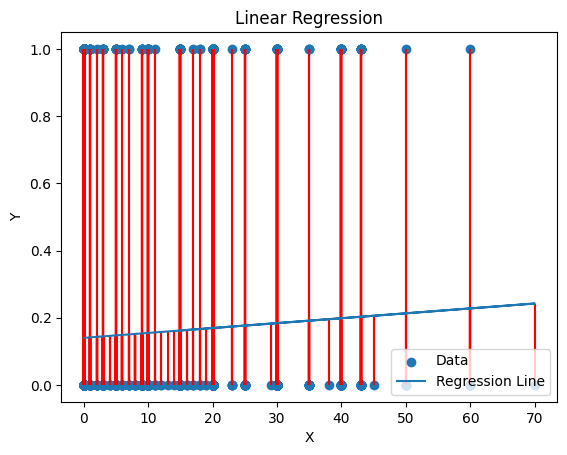

In [64]:
x = X['cigsPerDay']
reg = slr(x,y) # Run the regression
print('Coefficients: ',reg['b0'],reg['b1'])

# Plot the resuts:
for i in range(len(x)):
    plt.vlines(x[i], y[i], reg['y_hat'][i], color='r') # Visualize residuals


plt.scatter(x,y,label='Data')
plt.plot(x,reg['y_hat'],label='Regression Line')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='lower right')
plt.title('Linear Regression')

In [17]:
def mlr(X,y): # Multiple linear regression, matrix algebra approach
    XpX = X.T@X # Compute X'X
    Xpy = X.T@y # Compute X'y
    b = np.linalg.solve(XpX, Xpy) # Solve normal equations
    y_hat = X@b # Compute predictions
    residuals = y-y_hat # Compute residuals
    SSE =  np.inner(residuals,residuals) # Compute SSE
    rsq = 1 - SSE/np.inner( y-np.mean(y),y-np.mean(y)) # Compute Rsq
    return({'b':b,'y_hat':y_hat,'residuals':residuals,'rsq':rsq,'SSE':SSE})

[ 2.13015399e-03  3.26333679e-04 -9.05564046e-05  1.99832857e-01
 -7.23404732e-03  5.36139624e-03  9.82433630e-02]
0.0673537551196306


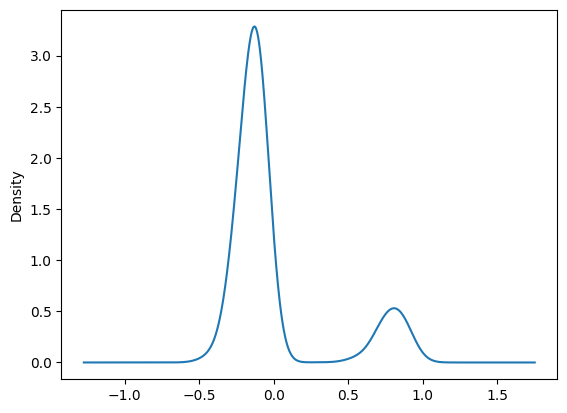

In [48]:
reg = mlr(X,y) # Run multiple linear regression
print(reg['b']) # Print coefficients
reg['residuals'].plot.kde() # Plot residuals
print(reg['rsq']) # R-squared measure of model fit